In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Voltage Probe Signal as magnetization of the probe is rotated

<img src="Four_probe_spin_voltage.png">

In [154]:
#constants 
h_bar = 1.06e-34
q = 1.6e-19
m_e = 9.1e-31
#Let's take m_c to be 0.1*m_e

In [198]:
#parameters 
N_prob = 50
N_tot = 2*N_prob
m_c = 0.25*m_e
a = 2.5e-09
t_0 = (h_bar**2)/(2*m_c*q*(a**2)) #(in eV)

In [199]:
#Set E to t_0
E = t_0 
z_plus = complex(0,1)*1e-12
ka = np.arccos(1-(E+z_plus)/(2*t_0))

In [200]:
#matrices
H = np.array([[0 for i in range(N_tot)] for j in range(N_tot)], dtype = np.complex_)
H_0 = np.array([[0 for i in range(N_prob)] for j in range(N_prob)], dtype = np.complex_)
H_1 = np.array([[0 for i in range(N_prob)] for j in range(N_prob)], dtype = np.complex_)
H_2 = np.array([[0 for i in range(N_prob)] for j in range(N_prob)], dtype = np.complex_)
Sigma_1 = np.array([[0 for i in range(N_tot)] for j in range(N_tot)], dtype = np.complex_)
Sigma_1_dag = np.array([[0 for i in range(N_tot)] for j in range(N_tot)], dtype = np.complex_)
Sigma_2 = np.array([[0 for i in range(N_tot)] for j in range(N_tot)], dtype = np.complex_)
Sigma_2_dag =np.array([[0 for i in range(N_tot)] for j in range(N_tot)], dtype = np.complex_)
Sigma_L = np.array([[0 for i in range(N_tot)] for j in range(N_tot)], dtype = np.complex_)
Sigma_L_dag = np.array([[0 for i in range(N_tot)] for j in range(N_tot)], dtype = np.complex_)
Sigma_R = np.array([[0 for i in range(N_tot)] for j in range(N_tot)], dtype = np.complex_)
Sigma_R_dag = np.array([[0 for i in range(N_tot)] for j in range(N_tot)], dtype = np.complex_)
Gamma_1 = np.array([[0 for i in range(N_tot)] for j in range(N_tot)], dtype = np.complex_)
Gamma_2 = np.array([[0 for i in range(N_tot)] for j in range(N_tot)], dtype = np.complex_)
Gamma_L = np.array([[0 for i in range(N_tot)] for j in range(N_tot)], dtype = np.complex_)
Gamma_R = np.array([[0 for i in range(N_tot)] for j in range(N_tot)], dtype = np.complex_)
G_inv = np.array([[0 for i in range(N_tot)] for j in range(N_tot)], dtype = np.complex_)
G = np.array([[0 for i in range(N_tot)] for j in range(N_tot)], dtype = np.complex_)
G_dag = np.array([[0 for i in range(N_tot)] for j in range(N_tot)], dtype = np.complex_)
EI = np.array([[0 for i in range(N_tot)] for j in range(N_tot)], dtype = np.complex_)

In [201]:
#non-magnetic contacts
Sigma_L[0][0] = -t_0*np.exp(complex(0,1)*ka)
Sigma_L[1][1] = -t_0*np.exp(complex(0,1)*ka)
Sigma_L_dag[0][0] = -t_0*np.exp(complex(0,-1)*ka)
Sigma_L_dag[1][1] = -t_0*np.exp(complex(0,-1)*ka)
Sigma_R[N_tot-1][N_tot-1] = -t_0*np.exp(complex(0,1)*ka) 
Sigma_R[N_tot-2][N_tot-2] = -t_0*np.exp(complex(0,1)*ka) 
Sigma_R_dag[N_tot-1][N_tot-1] = -t_0*np.exp(complex(0,-1)*ka) 
Sigma_R_dag[N_tot-2][N_tot-2] = -t_0*np.exp(complex(0,-1)*ka) 

L_1 = np.array([[0 for i in range(N_prob)] for j in range(N_prob)], dtype = np.complex_)
L_1[8][8] = 0.1
L_2 = np.array([[0 for i in range(N_prob)] for j in range(N_prob)], dtype = np.complex_)
L_2[18][18] = 0.1

In [202]:
for l in range(N_tot):
    EI[l][l] = E+z_plus

In [203]:
Gamma_L = complex(0,1)*(Sigma_L - Sigma_L.conjugate().transpose())
Gamma_R = complex(0,1)*(Sigma_R - Sigma_R.conjugate().transpose())

# Buttiker equations 
In the situation under consideration, we know that $I_2 = 0 = I_R$, $\mu_1 = 1$, and $\mu_L = 0$. The Buttiker equations can be written in matrix form as shown below: <br>
$$
\begin{bmatrix}
I_1 \\
0 \\
0
\end{bmatrix} =
\begin{bmatrix}
T_{1L} + T_{12} + T_{1R} & -T_{12} & T_{1R}\\
-T_{21} & T_{21} + T_{21}+T_{2L}+T_{2R} & -T_{2R}\\
-T_{R1} & -T_{R2} & T_{R1} + T_{RL} + T_{R2} 
\end{bmatrix}
\begin{bmatrix}
1 \\
\mu_2 \\
\mu_R
\end{bmatrix}
$$
The second and third equations can be re-written as:<br>
$$
\begin{bmatrix}
T_{21} \\
T_{R1}
\end{bmatrix}
= 
\begin{bmatrix}
T_{21}+T_{2L}+T_{2R} & -T_{2R}\\
-T_{R2} & T_{R1} + T_{RL} + T_{R2}
\end{bmatrix}
\begin{bmatrix}
\mu_2 \\
\mu_R
\end{bmatrix}
$$
Therefore, <br>
$$
\begin{bmatrix}
\mu_2 \\
\mu_R
\end{bmatrix} = 
\begin{bmatrix}
T_{21}+T_{2L}+T_{2R} & -T_{2R}\\
-T_{R2} & T_{R1} + T_{RL} + T_{R2}
\end{bmatrix}^{-1}
\begin{bmatrix}
T_{21} \\
T_{R1}
\end{bmatrix}
$$

In [204]:
#magnetic contacts
#Polarization vectors
P_1 = 0.7*np.array([0,0,1])

mu_2 = []
mu_R = []

theta_space = np.linspace(0,4,40)

for theta in theta_space:
    #Taking P_2 in the x-z plane
    P_2 = np.array([np.sin(theta*np.pi), 0, np.cos(np.pi*theta)])
    for i in range(N_prob):
        H_0[i][i] = 2*t_0
        if(i<49):
            H_1[i][i+1] = -t_0
            H_2[i+1][i] = -t_0
    H = np.kron(H_0, np.eye(2)) + np.kron(H_1, np.eye(2)) + np.kron(H_2, np.eye(2))
    sig1 = np.array([[0,1],[1,0]], dtype = np.complex_)
    sig2 = np.array([[0,complex(0,-1)],[complex(0,1),0]], dtype = np.complex_)
    sig3 = np.array([[1,0],[0,-1]], dtype=np.complex_)
    I_2 = np.array([[1,0],[0,1]], dtype = np.complex_)
   
    s_1 = -t_0*np.exp(complex(0,-1)*ka)*(I_2 + P_1[0]*sig1 + P_1[1]*sig2 + P_1[2]*sig3)
    s_2 = -t_0*np.exp(complex(0,-1)*ka)*(I_2 + P_2[0]*sig1 + P_2[1]*sig2 + P_2[2]*sig3)  
    
    Sigma_1 = np.kron(L_1, s_1)
    Sigma_2 = np.kron(L_2, s_2)
    Gamma_1 = complex(0,1)*(Sigma_1 - Sigma_1.conjugate().transpose())
    Gamma_2 = complex(0,1)*(Sigma_2 - Sigma_2.conjugate().transpose())
    
    G_inv = EI - H - Sigma_1 - Sigma_2 - Sigma_L - Sigma_R
    G=np.linalg.inv(G_inv)
    
    #Transmissions
    T_1L = np.trace(np.dot(np.dot(np.dot(Gamma_1, G),Gamma_L), G.conjugate().transpose()))
    T_12 = np.trace(np.dot(np.dot(np.dot(Gamma_1, G),Gamma_2), G.conjugate().transpose()))
    T_1R = np.trace(np.dot(np.dot(np.dot(Gamma_1, G),Gamma_R), G.conjugate().transpose()))
    T_L1 = np.trace(np.dot(np.dot(np.dot(Gamma_L, G),Gamma_1), G.conjugate().transpose()))
    T_L2 = np.trace(np.dot(np.dot(np.dot(Gamma_L, G),Gamma_2), G.conjugate().transpose()))
    T_LR = np.trace(np.dot(np.dot(np.dot(Gamma_L, G),Gamma_R), G.conjugate().transpose()))
    T_21 = np.trace(np.dot(np.dot(np.dot(Gamma_2, G),Gamma_1), G.conjugate().transpose()))
    T_2L = np.trace(np.dot(np.dot(np.dot(Gamma_2, G),Gamma_L), G.conjugate().transpose()))
    T_2R = np.trace(np.dot(np.dot(np.dot(Gamma_2, G),Gamma_R), G.conjugate().transpose()))
    T_R1 = np.trace(np.dot(np.dot(np.dot(Gamma_R, G),Gamma_1), G.conjugate().transpose()))
    T_RL = np.trace(np.dot(np.dot(np.dot(Gamma_R, G),Gamma_L), G.conjugate().transpose()))
    T_R2 = np.trace(np.dot(np.dot(np.dot(Gamma_R, G),Gamma_2), G.conjugate().transpose()))
    
    #Solutions of Buttiker equations
    T_mat = np.array([[T_21+T_2L+T_2R, -T_2R], [-T_R2, T_R1+T_RL+T_R2]])
    T_vec = np.array([[T_21],[T_R1]])
    mu_vec = np.dot(np.linalg.inv(T_mat), T_vec)
    mu_2.append(mu_vec[0][0])
    mu_R.append(mu_vec[1][0]) 

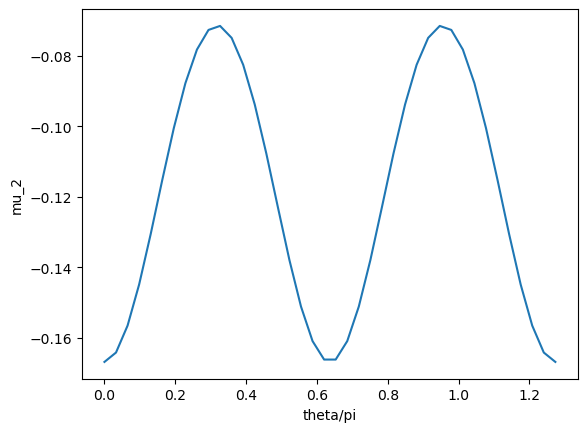

In [205]:
plt.xlabel("theta/pi")
plt.ylabel("mu_2")
plt.plot((1/np.pi)*theta_space, mu_2)